<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_32_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 32: Datapreprocessing on cars_data, Feature Encoding

#DataPreprocessing on Cars-data

**Dataset Description:**

The dataset contains 205 rows and 26 columns. Each column represents an attribute of a car as described in the table below.

|Sr No.|Attribute|Attribute Information|
|-|-|-|
|1|Car_ID|Unique id of each car (Integer)|
|2|Symboling|Assigned insurance risk rating; a value of +3 indicates that the car is risky; -3 suggests that it is probably a safe car (Categorical)|
|3|carCompany|Name of car company (Categorical)|
|4|fueltype| fuel-type i.e. petrol or diesel (Categorical)|
|5|aspiration|Aspiration used in a car (Categorical)|
|6|doornumber|Number of doors in a car (Categorical)|
|7|carbody|Body-type of a car (Categorical)|
|8|drivewheel|Type of drive wheel (Categorical)|
|9|enginelocation|Location of car engine (Categorical)|
|10|wheelbase|Weelbase of car (Numeric)|
|11|carlength|Length of car (Numeric)|
|12|carwidth|Width of car (Numeric)|
|13|carheight|Height of car (Numeric)|
|14|curbweight|The weight of a car without occupants or baggage (Numeric)|
|15|enginetype|Type of engine (Categorical)|
|16|cylindernumber|Number of cylinders placed in the car engine (Categorical)||17|enginesize|Capacity of an engine (Numeric)|
|18|fuelsystem|Fuel system of a car (Categorical)|
|19|boreratio|Bore ratio of car (Numeric)|
|20|stroke|Stroke or volume inside the engine (Numeric)|
|21|compressionratio|Compression ratio of an engine (Numeric)|
|22|horsepower|Power output of an engine (Numeric)|
|23|peakrpm|Peak revolutions per minute (Numeric)|
|24|citympg|Mileage in city (Numeric)|
|25|highwaympg|Mileage on highway (Numeric)|
|26|price(Dependent variable)|Price of a car (Numeric)|

This data set consists of three types of entities:

- the specification of an auto in terms of various characteristics,

- its assigned insurance risk rating,

- its normalised losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process **symboling**. A value of $+3$ indicates that the auto is risky, $-3$ that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality etc.), and represents the average loss per car per year.


**Dataset source:** https://archive.ics.uci.edu/ml/datasets/Automobile

https://www.kaggle.com/datasets/toramky/automobile-dataset/code


The above dataset consists of data taken from 1985 Ward's Automotive Yearbook. Here's the list of original sources of the data:

1. 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.

2. Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038

3. Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037






---

### Activity 1: Loading Data


In [ ]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
cars_df = pd.read_csv("/content/drive/MyDrive/datasets/car-prices.csv")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#Get the information on the dataset.
cars_df.info()

---

### Activitiy 2: Data Cleaning

Let's clean the data. You need to extract the name of the manufacturer of a from the column `CarName`. Let's look at the first few rows of the `'CarName'` column to understand how the name of a car is reported in the dataset.

In [ ]:
#  Display the first 25 rows of the 'CarName' column.
cars_df["CarName"].head(25)

Notice that the name of a car follows the name of its manufacturer as illustrated below:

- `alfa-romero` is the manufacturer of `giulia, stelvio` etc cars,

- `audi` is the manufacturer of `100 ls, fox` etc cars,

- `bmw` is the manufacture of `x1, x3` etc cars

and so on.


In [ ]:
"how are you?".split(" ")[0]

In [ ]:
"audi 100ls".split(" ")[0]

In [ ]:
# Extract the name of the manufactures from the car names
car_companies = []
for i in cars_df["CarName"]:
   car_companies.append(i.split(" ")[0])
car_companies = pd.Series(car_companies)
car_companies

,0
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
200,volvo
201,volvo
202,volvo
203,volvo


In [ ]:
# list comprehension for same above activity

cc = pd.Series([ i.split(" ")[0] for i in cars_df["CarName"]])
cc.head(5)

Let's add a new column to the `cars_df` DataFrame that stores the company names.

In [ ]:
# Create a new column named 'car_company'
cars_df["car_company"] = car_companies
cars_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


You may get the count of number of the cars sold be each manufacturer in the dataset.

In [ ]:
# Get the count of number of the cars sold be each manufacturer in the dataset.
cars_df["car_company"].value_counts()


,count
car_company,
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
peugeot,11
volvo,11
volkswagen,9


As you can see, Toyota has sold the number of cars in this dataset.

Notice that the following manufacturer names are misspelled or not regularised (follows the same case i.e. uppper case or lower case or title case):

- `vw` and `vokswagen` should be `volkswagen`,

- `porcshce` should be `porsche`,

- `toyouta` should be `toyota`,

- `Nissan` should be `nissan`,

- `maxda` should be `mazda`

To maintain the quality of data, let's resolve the above issues.

In [ ]:
# Replace the misspelled 'car_company' names with their correct names.

# volkswagen
cars_df.loc[(cars_df['car_company'] == "vw") | (cars_df['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

# porsche
cars_df.loc[cars_df['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars_df.loc[cars_df['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars_df.loc[cars_df['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars_df.loc[cars_df['car_company'] == "maxda", 'car_company'] = 'mazda'

Now get the count of number of the cars sold be each manufacturer in the dataset again to verify whether the names are corrected successfully or not.

In [ ]:
# Get the count of number of the cars sold be each manufacturer in the dataset again
cars_df["car_company"].value_counts()

,count
car_company,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugeot,11
volvo,11


FInally the manufacturer names are successfully corrected. Let's now drop the `'CarName'` column as it is of no use to us.

In [ ]:
cars_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'car_company'],
      dtype='object')

In [ ]:
#  Drop 'CarName' column from the 'cars_df' DataFrame.
cars_df.drop(columns=["CarName"],axis = 1,inplace= True)

In [ ]:
# Print the names of the columns to verify whether the 'CarName' column is dropped or not.

cars_df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

In [ ]:
cars_df.shape

(205, 26)

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

---

### Activity 3: The `select_dtypes()` function



let's extract all the numeric features from the `cars_df` DataFrame. For this, you need to use the `select_dtypes()` function. It takes a list of data-types (in the form of strings) as inputs that need to be extracted.

**Syntax:** `data_frame.select_dtypes(include = ['data_type1', 'data_type2', ..., data_typeN])`

where `'data_type1', 'data_type2', ..., data_typeN` are $N$ different types of data-types that you wish to extract.




In [ ]:
# Use the 'info()' function to get the data-types of each column.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

The numeric objects are of `int64` and `float64` data-types. You need to extract the features having these data-types.

In [ ]:
cars_df.select_dtypes(include=["int"])

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,1,3,2548,130,111,5000,21,27
1,2,3,2548,130,111,5000,21,27
2,3,1,2823,152,154,5000,19,26
3,4,2,2337,109,102,5500,24,30
4,5,2,2824,136,115,5500,18,22
...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28
201,202,-1,3049,141,160,5300,19,25
202,203,-1,3012,173,134,5500,18,23
203,204,-1,3217,145,106,4800,26,27


In [ ]:
# Extract all the numeric (float and int type) columns from the dataset.
cars_numeric_df = cars_df.select_dtypes(include=["int64","float64"])
cars_numeric_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's find out the features that strongly and moderately are correlated to the price of a car.

In [ ]:
cars_numeric_df.shape

(205, 16)

In [ ]:
cars_numeric_df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


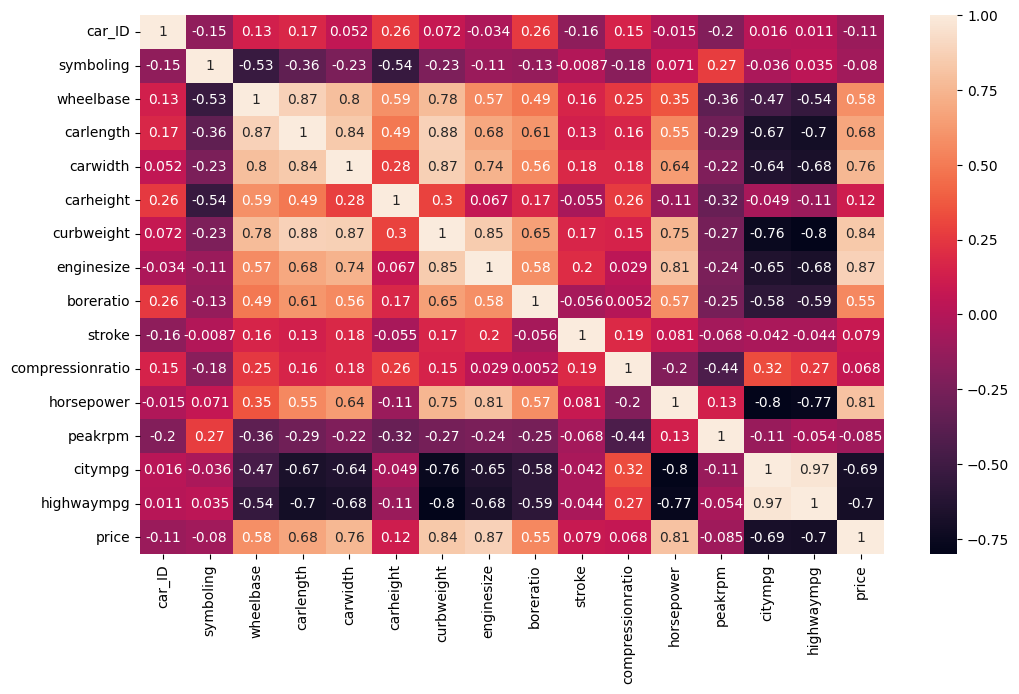

In [ ]:
# Draw a correlation heatmap between the numeric features.
plt.figure(figsize=(12,7))
sns.heatmap(cars_numeric_df.corr(),annot = True)
plt.show()

The heatmap shows some useful insights:

**Correlation of `price` with independent variables**

- `price` is highly and positively correlated with `wheelbase, carlength, carwidth, curbweight, enginesize` and `horsepower`

- `price` is negatively correlated to `citympg` and `highwaympg` (`-0.70` approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower. These cars are designed to be affordable by the budget buyers who value more fuel efficiency mileage over powerful engine

**Correlation among independent variables**

- Many independent variables are highly correlated (top-left part of the heatmap) such as `wheelbase, carlength, curbweight, enginesize` etc. They are all measures of size and weight and are positively correlated


Now let's look at the first five rows of the `doornumber` and `cylindernumber` columns.

In [ ]:
cars_df[["doornumber","cylindernumber"]].value_counts()

doornumber  cylindernumber
four        four              92
two         four              67
four        six               13
two         six               11
four        five               8
two         two                4
            eight              3
            five               3
four        eight              2
two         three              1
            twelve             1
Name: count, dtype: int64

In [ ]:
# Get the first five rows of the 'doornumber' and 'cylindernumber' columns.
cars_df[["doornumber","cylindernumber"]].head()

,doornumber,cylindernumber
0,two,four
1,two,four
2,two,six
3,four,four
4,four,five


Notice that the `doornumber` and `cylindernumber` columns are supposed to have numeric type values. But the numbers are reported in the words. So, you need to replace these words with the corresponding numbers. For this you can use the `map()` function. But first let's get the counts of all the values in the above two columns so that we can verify with these counts whether the the conversion to numeric values was successful or not.



In [ ]:
# Count the occurrence of each value in the 'cylindernumber' column.
cars_df['cylindernumber'].value_counts()

,count
cylindernumber,
four,159
six,24
five,11
eight,5
two,4
three,1
twelve,1


So, you need to represent the above numbers (written in words) into their numeric forms.

In [ ]:
# Count the occurrence of each value in the 'doornumber' column.
cars_df['doornumber'].value_counts()

,count
doornumber,
four,115
two,90


Here, you need to represent `two` and `four` to their numeric forms.Now, let's learn the `map()` function.

---

### Activity 4: The `map()` Function

A map function is similar to a match the column exercise. You have a match one set of values with the other set of values.

Here you need to map:

- `one` to `1`

- `three` to `3`

- `four` to `4`

- `five` to `5`

- `six` to `6`

- `eight` to `8`

- `twelve` to `12`

To do the above replacement,

1. First, you need to create a dictionary in which the words are keys and their corresponding numeric representations are the values.

2. Apply the `map()` function. It takes the dictionary created in step one as an input.

Let's understand this concept with the help of an example. Let's first create a Pandas series containing the above 7 numbers in the word form. Then let's create a dictionary as discussed in the first point. And then apply the `map()` function.



In [ ]:
words = pd.Series(["two", "three", "four", "five", "six", "eight", "twelve","ten"])
print(words)

0       two
1     three
2      four
3      five
4       six
5     eight
6    twelve
7       ten
dtype: object


In [ ]:
words_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
words_dict

{'two': 2,
 'three': 3,
 'four': 4,
 'five': 5,
 'six': 6,
 'eight': 8,
 'twelve': 12}

In [ ]:
words.map(words_dict)

,0
0,2.0
1,3.0
2,4.0
3,5.0
4,6.0
5,8.0
6,12.0
7,NaN


In [ ]:
# Use the 'map()' function to replace a words in a Pandas series to their corresponding numeric values.

words_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
words = words.map(words_dict)
words

**How does the `map()` function works?**

It iterates through each element in a series (or array), and then look for that item as a key in the dictionary (the input to the `map()` function). If the key is found, then it replaces the key with its corresponding value in the dictionary.


In [ ]:
cars_df["doornumber"].map(words_dict)

,doornumber
0,2
1,2
2,2
3,4
4,4
...,...
200,4
201,4
202,4
203,4


In [ ]:
#  Map the values of the 'doornumber' and 'cylindernumber' columns to their corresponding numeric values.
def num_map(series):
    return series.map(words_dict)

# Applying the function to the two columns
cars_df[['cylindernumber', 'doornumber']] = cars_df[['cylindernumber', 'doornumber']].apply(num_map, axis = 1)

Now let's display the first five rows of the `'cylindernumber'` and `'doornumber'` columns to verify whether the replacement was successful or not. Let's also check whether the data-types are integer or not.

In [ ]:
# Display the first five rows of the 'cylindernumber' and 'doornumber' columns. Also, check whether the data-types are integer or not.
print(cars_df[['cylindernumber', 'doornumber']].head())
print(cars_df[['cylindernumber', 'doornumber']].info())

   cylindernumber  doornumber
0               4           2
1               4           2
2               6           2
3               4           4
4               5           4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   cylindernumber  205 non-null    int64
 1   doornumber      205 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB
None


#Feature Encoding- Label encoding, Onehotcoding, Target encoding


**Feature encoding**

Feature encoding is a important step in preparing data for machine learning models, especially when dealing with categorical variables.It is the process of converting categorical data into numerical values that machine learning algorithms can understand. There are several methods for feature encoding, including:

1. **Label Encoding:**
Label encoding assigns a unique integer to each category. For instance, if you have a column with colors: "Red", "Blue", and "Green", label encoding would convert it to 0, 1, and 2.

2. **One-Hot Encoding:** One-hot encoding creates a binary column for each category and assigns a 1 or 0 to indicate the presence or absence of the category. Using the same color example, one-hot encoding would create three new columns: "Red", "Blue", and "Green", with binary values.

3. **Target Encoding:** Target encoding replaces a categorical value with the mean of the target variable for that category. This method is useful when dealing with high-cardinality categorical features.





**High-cardinality** categorical features refer to categorical variables in a dataset that have a large number of unique categories or distinct values

columns--- features,variables,fields, and attributes

rows---observations,records,samples,instances

### Activity 1: Label Encoding

- Create a list of fruits: `['Apple', 'Banana', 'Cherry', 'Apple', 'Cherry', 'Banana', 'Apple']`
- Use label encoding to convert this list into numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# List of fruits
fruits = ['Apple', 'Banana', 'Cherry', 'Apple', 'Cherry', 'Banana', 'Apple']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the fruits list
encoded_fruits = label_encoder.fit_transform(fruits)

print("Original List:", fruits)
print("Encoded List:", encoded_fruits)

Original List: ['Apple', 'Banana', 'Cherry', 'Apple', 'Cherry', 'Banana', 'Apple']
Encoded List: [0 1 2 0 2 1 0]


In [ ]:
# Create a DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'M', 'S']
})

# Apply label encoding using sklearn
label_encoder = LabelEncoder()
data['Color_Label'] = label_encoder.fit_transform(data['Color'])
data['Size_Label'] = label_encoder.fit_transform(data['Size'])
data

,Color,Size,Color_Label,Size_Label
0,Red,S,2,2
1,Blue,M,0,1
2,Green,L,1,0
3,Blue,M,0,1
4,Red,S,2,2


In [ ]:
# Sample data
data = {'education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor']}
df = pd.DataFrame(data)



# Create an OrdinalEncoder with the desired categories
encoder = LabelEncoder()

# Fit and transform the data
df['education_encoded'] = encoder.fit_transform(df[['education']])

print(df)

     education  education_encoded
0  High School                  1
1     Bachelor                  0
2       Master                  2
3          PhD                  3
4     Bachelor                  0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Sample data
data = {'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'New York'],
        'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']}
df = pd.DataFrame(data)

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to 'City' column
df['City_encoded'] = le.fit_transform(df['City'])

# Apply label encoding to 'Color' column
df['Color_encoded'] = le.fit_transform(df['Color'])
df

,City,Color,City_encoded,Color_encoded
0,New York,Red,3,2
1,Los Angeles,Green,2,1
2,Chicago,Blue,0,0
3,Houston,Red,1,2
4,New York,Green,3,1


**Key Point**

The LabelEncoder in scikit-learn assigns labels based on alphabetical order by default.

The LabelEncoder in scikit-learn is designed to encode labels in alphabetical order by default, and the fit method doesn't actually respect the custom order of labels that you pass to it. It only learns the unique classes and assigns them numerical labels in alphabetical order.

If you want to encode labels in a specific order, you'll need to use the OrdinalEncoder instead.

Here's how you can do it using Categorical in pandas:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Sample data
data = {'education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor']}
df = pd.DataFrame(data)

# Define the desired order of categories
categories = ['High School', 'Bachelor', 'Master', 'PhD']

# Create an OrdinalEncoder with the desired categories
encoder = OrdinalEncoder(categories=[categories])

# Fit and transform the data
df['education_encoded'] = encoder.fit_transform(df[['education']])

print(df)

     education  education_encoded
0  High School                0.0
1     Bachelor                1.0
2       Master                2.0
3          PhD                3.0
4     Bachelor                1.0


### Activity 2: One-Hot Encoding using `pd.get_dummies()`

Use one-hot encoding to convert the list into a binary format.

In [ ]:
import pandas as pd

# Sample data
data = {'color': ['Red', 'Blue', 'Green', 'Red', 'Blue']}
df = pd.DataFrame(data)

# Apply one-hot encoding
df_one_hot = pd.get_dummies(df, columns=['color'],dtype=int)

print(df_one_hot)

   color_Blue  color_Green  color_Red
0           0            0          1
1           1            0          0
2           0            1          0
3           0            0          1
4           1            0          0


In [ ]:

# Create a DataFrame
df = pd.DataFrame({'Fruits': ['Apple', 'Banana', 'Cherry', 'Apple', 'Cherry', 'Banana', 'Apple']})

# Apply one-hot encoding
one_hot_encoded_fruits = pd.get_dummies(df, columns=['Fruits'],dtype=int)

one_hot_encoded_fruits

### Activity 3: Target Encoding

**Target Encoding**, also known as **Mean Encoding** or **Mean Target Encoding**, is a technique used to encode categorical variables based on the mean of the target variable for each category. It is particularly useful when dealing with high-cardinality categorical features in machine learning models.

**Encoding Process:**

- For each category in the categorical variable, calculate the mean of the target variable for that category
- Replace the original categorical values with these calculated mean values.

**How It Works?**

- **Calculate Mean:** For each category in the categorical feature, compute the average of the target variable values for that category.

- **Replace Values:** Substitute the original categorical values with these mean values in the dataset.



**Example:**
- Create a DataFrame with fruits and their corresponding prices: `['Apple', 'Banana', 'Cherry', 'Apple', 'Cherry', 'Banana', 'Apple']` and `[1.2, 0.5, 2.0, 1.3, 2.1, 0.6, 1.1]`
- Use target encoding to replace each fruit with the average price.

Features vs target
- The features are those variables which describe the features or properties of an entity.
- The variable which needs to be predicted is called a target variable.

In [ ]:
data = {'Fruits': ['Apple', 'Banana', 'Cherry', 'Apple', 'Cherry', 'Banana', 'Apple'],
        'Price': [1.2, 0.5, 2.0, 1.3, 2.1, 0.6, 1.1]}
df = pd.DataFrame(data)
df

,Fruits,Price
0,Apple,1.2
1,Banana,0.5
2,Cherry,2.0
3,Apple,1.3
4,Cherry,2.1
5,Banana,0.6
6,Apple,1.1


In [ ]:
df.groupby(by="Fruits").get_group("Apple")["Price"].mean()

1.2

In [ ]:

# Create a DataFrame
data = {'Fruits': ['Apple', 'Banana', 'Cherry', 'Apple', 'Cherry', 'Banana', 'Apple'],
        'Price': [1.2, 0.5, 2.0, 1.3, 2.1, 0.6, 1.1]}
df = pd.DataFrame(data)

# Calculate the mean price for each fruit
mean_price = df.groupby('Fruits')['Price'].mean()

# Map the mean price to each fruit
df['Target_Encoded'] = df['Fruits'].map(mean_price)

df

,Fruits,Price,Target_Encoded
0,Apple,1.2,1.20
1,Banana,0.5,0.55
2,Cherry,2.0,2.05
3,Apple,1.3,1.20
4,Cherry,2.1,2.05
5,Banana,0.6,0.55
6,Apple,1.1,1.20


In [ ]:
data = {'Fruits': ['Apple', 'Banana', 'Cherry', 'Apple', 'Cherry', 'Banana', 'Apple'],
        'Price': [1.2, 0.5, 2.0, 1.3, 2.1, 0.6, 1.1]}
df = pd.DataFrame(data)
df

In [ ]:
df.groupby("Fruits")["Price"].mean()

In [ ]:
# Sample data
data = {'City': ['New York', 'Boston', 'New York', 'Boston', 'Chicago'],
        'Sales': [100, 150, 200, 250, 300]}

df = pd.DataFrame(data)

# Calculate mean sales for each city
mean_sales = df.groupby('City')['Sales'].mean()

# Map the mean sales back to the original dataframe
df['City_Encoded'] = df['City'].map(mean_sales)

print(df)

       City  Sales  City_Encoded
0  New York    100         150.0
1    Boston    150         200.0
2  New York    200         150.0
3    Boston    250         200.0
4   Chicago    300         300.0


### Activity 4: Feature Encoding with `pd.get_dummies` on cars data

Feature encoding is a method used to convert categorical data into numerical data so that machine learning algorithms can process it.

Using `pd.get_dummies` is a convenient function provided by the pandas library for converting categorical variables into a form that can be provided to machine learning algorithms to do a better job in prediction. This method is also known as one-hot encoding.

**Why Feature Encoding?**

Most machine learning algorithms require numerical input. Categorical data, which includes text labels like "red," "blue," "cat," or "dog," needs to be transformed into a numerical format. This transformation is called feature encoding.

**Why Use `pd.get_dummies`?**

One-hot encoding is particularly useful when dealing with categorical variables. It transforms each unique category value into a new column and assigns a `1` or `0` (True/False) value to the column. This method ensures that the machine learning model does not assume any ordinal relationship between the categories.

If we want all the features  to be numeric values. This can be done by following the feature encoding steps.

Let's understand this concept with the help of an example. Let's consider the `carbody` column in the `cars_df` DataFrame.

In [ ]:
# Import the modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
cars_df = pd.read_csv("/content/drive/MyDrive/datasets/car-prices.csv")


# Data Cleaning
# Extract the name of the manufactures from the car names and display the first 25 cars to verify whether names are extracted successfully.
car_companies = pd.Series([car.split(" ")[0] for car in cars_df['CarName']], index = cars_df.index)

# Create a new column named 'car_company'. It should store the company names of a the cars.
cars_df['car_company'] = car_companies

# Replace the misspelled 'car_company' names with their correct names.
# volkswagen
cars_df.loc[(cars_df['car_company'] == "vw") | (cars_df['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

# porsche
cars_df.loc[cars_df['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars_df.loc[cars_df['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars_df.loc[cars_df['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars_df.loc[cars_df['car_company'] == "maxda", 'car_company'] = 'mazda'

# Drop 'CarName' column from the 'cars_df' DataFrame.
cars_df.drop(columns= ['CarName'], axis = 1, inplace = True)

# Data Preparation
# Extract all the numeric (float and int type) columns from the dataset.
cars_numeric_df = cars_df.select_dtypes(include = ['int64', 'float64'])

# Mapping Categorical Values
# Map the values of the 'doornumber' and 'cylindernumber' columns to their corresponding numeric values.
words_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
def num_map(series):
    return series.map(words_dict)

# Applying the function to the two columns
cars_df[['cylindernumber', 'doornumber']] = cars_df[['cylindernumber', 'doornumber']].apply(num_map, axis = 1)

In [ ]:
#  Get the counts of each of the values in the 'carbody' column.
cars_df["carbody"].value_counts()

,count
carbody,
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


For the `carbody` feature, there are five different types of values

- `sedan`

- `hatchback`

- `wagon`

- `hardtop`

- `convertible`

For each of the above values, you can add columns into your DataFrame such that each column has either `0` or `1` as its value. Eg., for the `sedan` value, you add a column named `sedan`. And if the car is a sedan, then the value in the `sedan` column will be `1` otherwise, it will be `0`. You can do this using the `get_dummies()` function of the Pandas module.

**Syntax:** `pandas.get_dummies(categorical_column, dtype = data_type)`

where

- `categorical_column` is the column having non-numeric categorical values

- `data_type` of the values in the newly added columns.


In [ ]:
# Create dummy variables for the 'carbody' columns.

car_body_dummies = pd.get_dummies(cars_df["carbody"],dtype = int)
car_body_dummies

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


As you can see, the output is a DataFrame containing five columns.

The first two cars (first two rows) are convertibles. Hence, the values in the `convertible` columns are `1` and in the other 4 columns are `0`. Similarly, the third car (third row) is a hatchback. Hence, the value in the `hatchback` column is `1` and in the other 4 columns are `0`.

These newly added columns are called **dummy variables (or columns)**. Let's check whether the data-types for these dummy columns is integer or not.



In [ ]:
# Check whether the data-types for these dummy columns is integer or not.
car_body_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   convertible  205 non-null    int64
 1   hardtop      205 non-null    int64
 2   hatchback    205 non-null    int64
 3   sedan        205 non-null    int64
 4   wagon        205 non-null    int64
dtypes: int64(5)
memory usage: 8.1 KB


In the above process, for each categorical value (i.e., `convertible,	hardtop, hatchback, sedan, wagon`) we added a new column. This process of obtaining numeric values from non-numeric categorical values is called **one-hot encoding**.

Here for 5 categorical values, we added 5 new dummy columns. In general, for $n$ categorical values in a column, we can add $n$ new dummy columns.

We can do the same thing with one less column i.e. for $n$ categorical values, we can add only $n - 1$ columns to convey the same information. To have a one column less, pass `drop_first = True` as another input to the `get_dummies()` function of the Pandas module.

In [ ]:
# Create dummy variables for the 'carbody' columns with 1 column less.

car_body_dummies_new = pd.get_dummies(cars_df["carbody"],drop_first = 1,dtype = int)
car_body_dummies_new

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
200,0,0,1,0
201,0,0,1,0
202,0,0,1,0
203,0,0,1,0


In the above DataFrame having dummy variabes, we have 4 columns i.e. `hardtop, hatchback, sedan` and `wagon`.

For the first two cars (first two rows) the values in the other 4 columns are `0`. This means the car is convertible. Similarly, for the third car (third row) the value in the `hatchback` column is `1` and in the other 3 columns are `0`. This means the car is a hatchback.

This process of having one less dummy variable by encoding non-numeric categorical values to numeric values is called **dummy coding**. The naming convention is strange so just focus on the part that how  you can encode (or code) non-numeric categorical values into numeric values.

In the same, you can encode all the other columns having categorical values to get numeric values.

In [ ]:
# Create a DataFrame containing all the non-numeric type features.
cars_categorical_df = cars_df.select_dtypes(include= ["object"])
cars_categorical_df


,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi
...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,mpfi,volvo
201,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo
202,gas,std,sedan,rwd,front,ohcv,mpfi,volvo
203,diesel,turbo,sedan,rwd,front,ohc,idi,volvo


For the above `object` or categorical columns, get the dummy variables using the **dummy coding** process.

In [ ]:
# Get dummy variables for all the categorical type columns using the dummy coding process.
cars_dummies_df = pd.get_dummies(cars_categorical_df,dtype= int, drop_first = True)
cars_dummies_df

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
201,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
202,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Now that we have dummy variables, we don't need the original non-numeric type columns in the `cars_df` DataFrame. So let's remove the original non-numeric type columns from the `cards_df` DataFrame and then concatenate it with the above DataFrame containing only numeric values for the non-numeric type columns.

In [ ]:
# Drop the categorical type columns from the 'cars_df' DataFrame.

cars_df.drop(list(cars_categorical_df.columns), axis = 1, inplace = True)

Now, let's concatenate the `cars_df` and `cars_dummies_df` DataFrames

In [ ]:
# Concatenate the 'cars_df' and 'cars_dummies_df' DataFrames.
cars_df = pd.concat([cars_df, cars_dummies_df], axis = 1)
cars_df.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,0,0


Let's verify whether all the columns have numeric values or not and also find out the number of columns we have after creating dummy variables.

In [ ]:
# Get the data-types of all the columns and the number of rows and columns in the 'cars_df' DataFrame.
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   doornumber              205 non-null    int64  
 3   wheelbase               205 non-null    float64
 4   carlength               205 non-null    float64
 5   carwidth                205 non-null    float64
 6   carheight               205 non-null    float64
 7   curbweight              205 non-null    int64  
 8   cylindernumber          205 non-null    int64  
 9   enginesize              205 non-null    int64  
 10  boreratio               205 non-null    float64
 11  stroke                  205 non-null    float64
 12  compressionratio        205 non-null    float64
 13  horsepower              205 non-null    int64  
 14  peakrpm                 205 non-null    in

**Why do we need feature encoding?**

Categorical data needs to be converted into a numerical format because most machine learning algorithms require numerical inputs to perform mathematical computations.


**Which encoding method should we use?**

The choice of encoding method depends on the nature of the categorical data and the machine learning algorithm being used. Label encoding is simple but may introduce ordinal relationships. One-hot encoding avoids this issue but can lead to high dimensionality. Target encoding is useful for high-cardinality features but may introduce target leakage.


In [ ]:
cars_df.columns

In [ ]:
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
import pandas as pd

# Create a DataFrame
data = {'CarBrand': ['Toyota', 'Ford', 'BMW', 'Toyota', 'BMW', 'Ford', 'Toyota'],
        'Price': [30000, 25000, 55000, 32000, 56000, 24000, 31000]}
df = pd.DataFrame(data)

# Calculate the mean price for each car brand
mean_price = df.groupby('CarBrand')['Price'].mean()

# Map the mean price to each car brand
df['Target_Encoded'] = df['CarBrand'].map(mean_price)

print("Original DataFrame:\n", df)
print("Target Encoded DataFrame:\n", df[['CarBrand', 'Target_Encoded']])

---